In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# setting options
pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", "{:.2f}".format)

In [2]:
# loading and viewing the dataset
df = pd.read_csv('data.csv', sep=',')
df.tail(10)

,Country,Year,Life expectancy at birth (years),GDP
86,Zimbabwe,2006,45.40,5443896500.00
87,Zimbabwe,2007,46.60,5291950100.00
88,Zimbabwe,2008,48.20,4415702800.00
89,Zimbabwe,2009,50.00,8621573608.00
90,Zimbabwe,2010,52.40,10141859710.00
91,Zimbabwe,2011,54.90,12098450749.00
92,Zimbabwe,2012,56.60,14242490252.00
93,Zimbabwe,2013,58.00,15451768659.00
94,Zimbabwe,2014,59.20,15891049236.00
95,Zimbabwe,2015,60.70,16304667807.00


In [3]:
# renaming columns
df.rename(columns={
    'Country': 'country',
    'Year': 'year',
    'Life expectancy at birth (years)': 'life_expectancy',
    'GDP': 'gdp'
}, inplace=True)

In [4]:
# inspecting the dataset
print(df.shape)
print()
print(df.columns)
print()
print(df.info())
print()
print(df['country'].unique().tolist())

(96, 4)

Index(['country', 'year', 'life_expectancy', 'gdp'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          96 non-null     object 
 1   year             96 non-null     int64  
 2   life_expectancy  96 non-null     float64
 3   gdp              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']


There are six counties in dataset: 'Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe'. There is no missing data in the dataset.

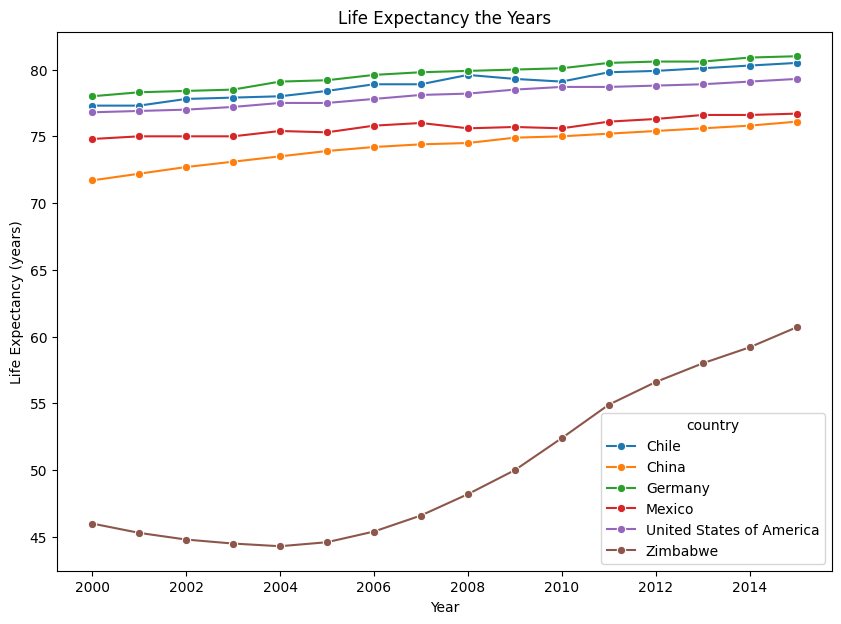

In [5]:
# creting a plot showing life expectancy by year
plt.figure(figsize=(10, 7), frameon=True)
sns.lineplot(data=df, x='year', y='life_expectancy', hue='country', marker='o', linestyle='-')
plt.title('Life Expectancy the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.show()

### Insights from the Life Expectancy Line Plot

1. Overall, life expectancy has increased in all observed countries over the past 15 years.  
2. The plot shows a significant gap in life expectancy between Zimbabwe and the other countries.  
3. From 2000 to 2004, Zimbabwe experienced a decline in life expectancy, which may indicate a period of national crisis.  
4. Starting in 2004, Zimbabwe's life expectancy began to grow at a faster rate compared to the other countries.  
5. In Mexico, life expectancy stagnated around 75 years between 2007 and 2010.  
6. A slight decline in life expectancy is observed in Germany from 2008 to 2010, which was likely caused by the global financial crisis.


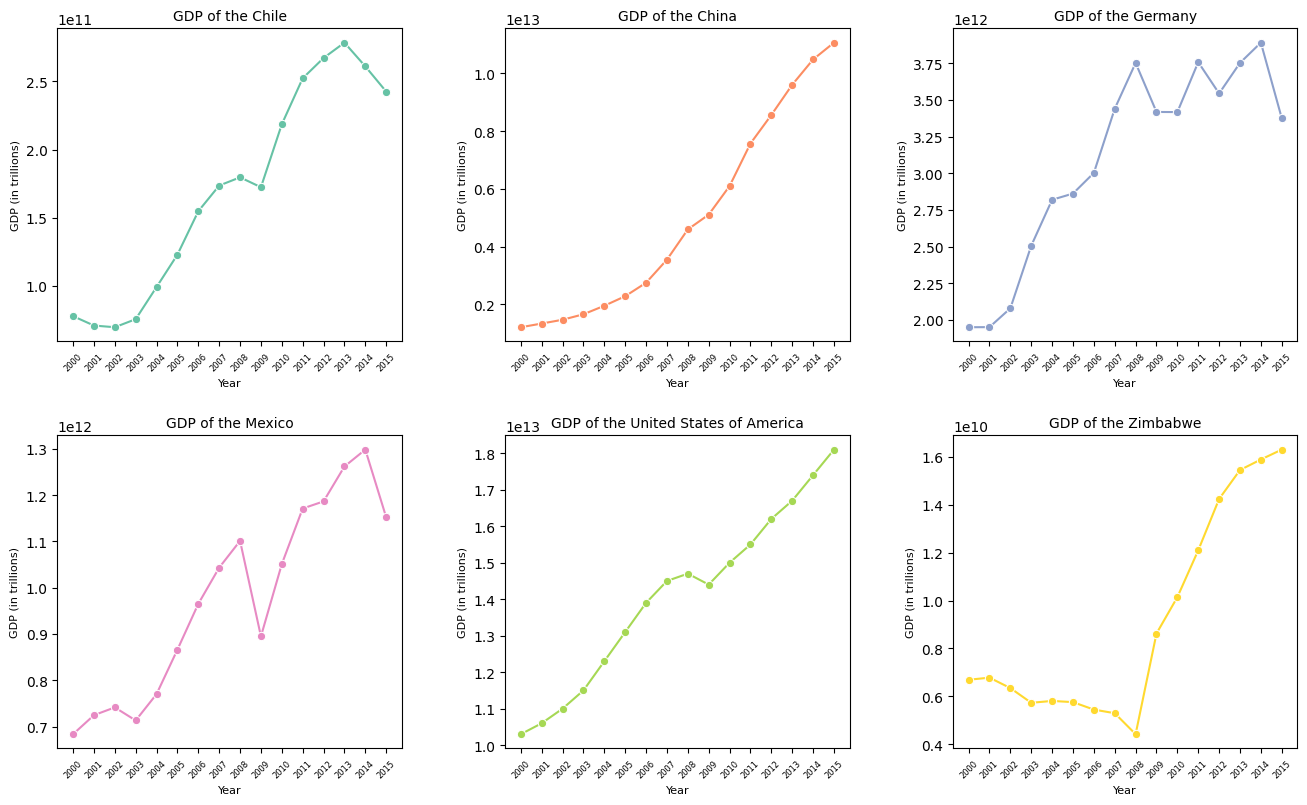

In [6]:
# creting a plots showing GDP by year
plt.figure(figsize=(16, 12), frameon=True)

number_of_countries = len(df['country'].unique())
countries = df['country'].unique()
# color palette for lines
colors = sns.color_palette("Set2", n_colors=number_of_countries)
# creating plot for each country
for i in range(number_of_countries):
    ax = plt.subplot(2, 3, i+1)
    # plotting GDP for counntry
    sns.lineplot(data=df[(df['country'] == countries[i])], x='year', y='gdp', marker='o', linestyle='-', color=colors[i], ax=ax)
    plt.title(f'GDP of the {countries[i]}', fontsize=10)
    plt.xlabel('Year', fontsize=8)
    plt.ylabel('GDP (in trillions)', fontsize=8)
    ax.set_xticks(sorted(df['year'].unique()))
    ax.set_xticklabels(df['year'].unique(), fontsize=6, rotation=45)

# adjusting the subplot
plt.subplots_adjust(bottom=0.3, wspace=0.3, hspace=0.3, top=0.9)
plt.show()

### Insights from the GDP Line Plot:

1. China's GDP has been growing steadily every year without any declines.  
2. The United States showed negative GDP growth in 2008, during the global financial crisis.  
3. Germany's economy has been stagnating since 2008.  
4. The 2008 crisis significantly affected Mexico, and the country showed one of the worst GDP trends among all the analyzed countries.  
5. Zimbabwe experienced a long and systematic decline in GDP from 2000 to 2008, followed by a sharp recovery and a strong positive growth trend in the following years.

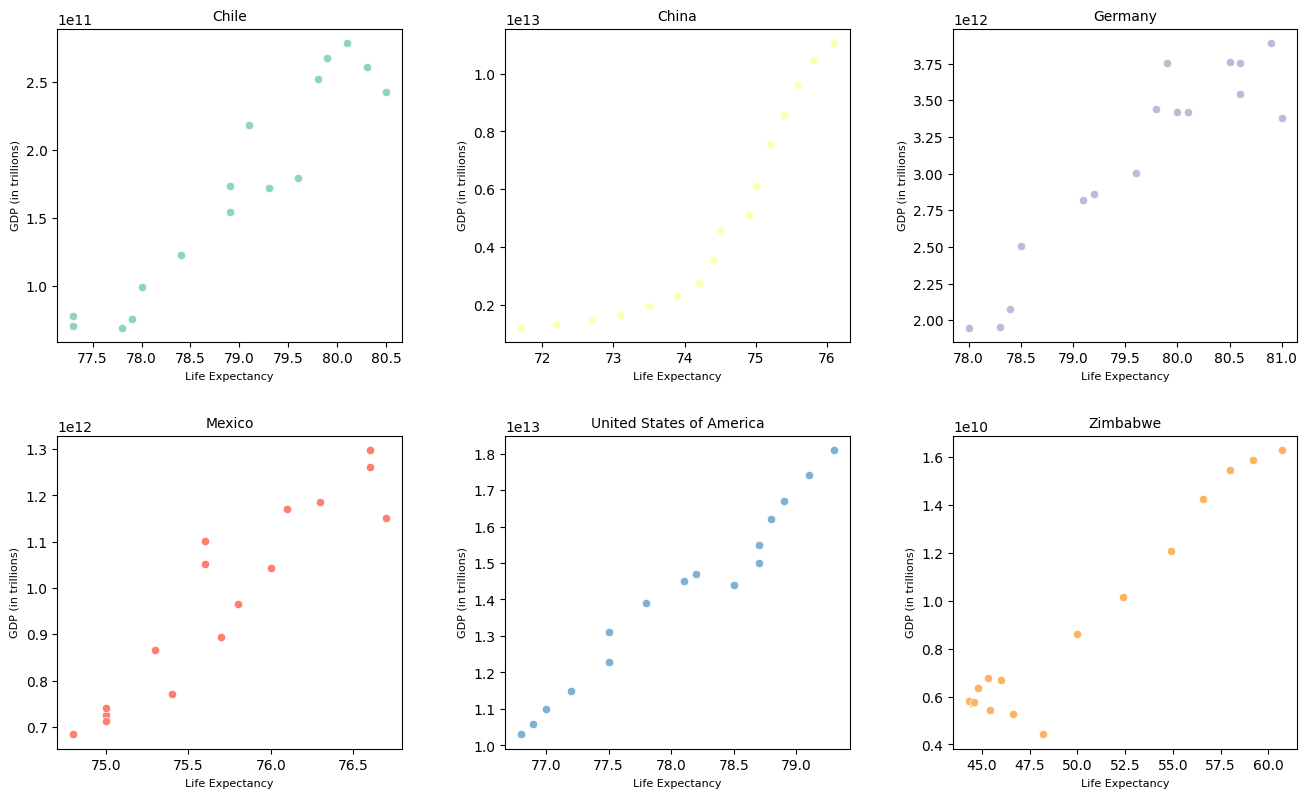

In [12]:
# creating a scatter plot showing GDP vs Life Expectancy
plt.figure(figsize=(16, 12), frameon=True)

number_of_countries = len(df['country'].unique())
countries = df['country'].unique()
# color palette for lines
colors = sns.color_palette("Set3", n_colors=number_of_countries)
# creating plot for each country
for i in range(number_of_countries):
    ax = plt.subplot(2, 3, i+1)
    # plotting GDP for counntry
    sns.scatterplot(data=df[(df['country'] == countries[i])], x='life_expectancy', y='gdp', marker='o', color=colors[i], ax=ax)
    plt.title(f'{countries[i]}', fontsize=10)
    plt.xlabel('Life Expectancy', fontsize=8)
    plt.ylabel('GDP (in trillions)', fontsize=8)
    # ax.set_xticks(sorted(df['year'].unique()))
    # ax.set_xticklabels(df['year'].unique(), fontsize=6, rotation=45)

# adjusting the subplot
plt.subplots_adjust(bottom=0.3, wspace=0.3, hspace=0.3, top=0.9)
plt.show()

### Conclusions:

There is a clear correlation between life expectancy and GDP levels in the analyzed countries.  
This is especially noticeable in the case of Zimbabwe. The connection is somewhat less pronounced in countries like Mexico and Chile.  
In the United States and China, life expectancy also increases as GDP grows.

In [7]:
# calculating the mean life expectancy for each country
for i in range(len(df['country'].unique())):
    country = df['country'].unique()[i]
    country_data = df[(df['country'] == country)]
    mean_life_expectancy = np.mean(country_data['life_expectancy'])
    print(f"{df['country'].unique()[i]} mean life expectancy: {mean_life_expectancy:.2f} years")

Chile mean life expectancy: 78.94 years
China mean life expectancy: 74.26 years
Germany mean life expectancy: 79.66 years
Mexico mean life expectancy: 75.72 years
United States of America mean life expectancy: 78.06 years
Zimbabwe mean life expectancy: 50.09 years


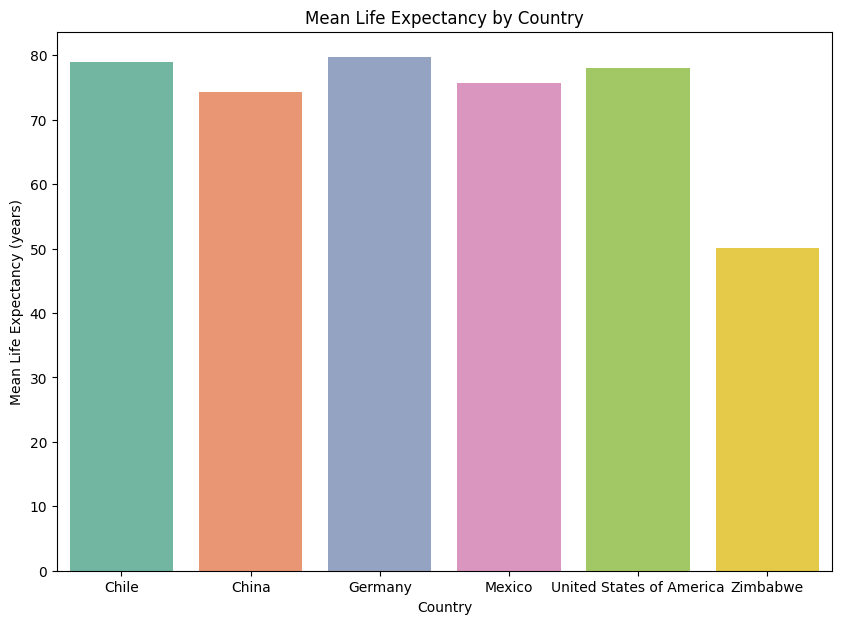

In [8]:
# creating a plot showing the mean life expectancy for each country
plt.figure(figsize=(10, 7), frameon=True)
sns.barplot(data=df, x='country', y='life_expectancy', hue='country', palette='Set2', errorbar=None)
plt.title('Mean Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Mean Life Expectancy (years)')
plt.show()

In [9]:
df['year'].unique()
len(df['year'].unique())
for i in range(len(df['country'].unique())):
    print(df['country'].unique()[i])

Chile
China
Germany
Mexico
United States of America
Zimbabwe
